# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [101]:
if os.name=='nt':
    !pip install wget
    import wget

In [102]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [80]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
error: [Errno 2] No such file or directory: 'd:\\data science\\jupyter\\id card detection and ocr\\tfodcourse\\idrealocr\\lib\\site-packages\\tensorflow_model_optimization-0.6.0-py3.7.egg\\tensorflow_model_optimization\\python\\core\\quantization\\keras\\collaborative_optimizations\\cluster_preserve\\cluster_preserve_quantize_registry.py'


copying build\lib\object_detection\builders\graph_rewriter_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\graph_rewriter_builder_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\hyperparams_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\hyperparams_builder_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\image_resizer_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\image_resizer_builder_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\input_reader_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\input_reader_builder_tf1_test.py -> build\bdist.win-amd64\egg\object_det

Obtaining file:///D:/Data%20Science/Jupyter/ID%20card%20detection%20and%20OCR/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [81]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-08-04 13:08:35.062979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-08-04 13:08:35.063050: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.9: D:\Data Science\Jupyter\ID card detection and OCR\TFODCourse\idrealocr\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-08-04 13:08:54.723308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-08-04 13:08:54.723407: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-04 13:08:54.731134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-G9SEN0N
2021-08-04 13:08:54.731304: I t

In [8]:
!pip install tensorflow --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.1 requires Cython, which is not installed.
tf-models-official 2.5.1 requires gin-config, which is not installed.
tf-models-official 2.5.1 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.1 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.1 requires matplotlib, which is not installed.
tf-models-official 2.5.1 requires oauth2client, which is not installed.
tf-models-official 2.5.1 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.1 requires Pillow, which is not installed.
tf-models-official 2.5.1 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.1 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.1 requires pyyaml>=5.1, which is not installed.
tf-models-offi


  Using cached tensorflow-2.5.0-cp37-cp37m-win_amd64.whl (422.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.5-py2.py3-none-any.whl (18 kB)


In [10]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3


  Using cached protobuf-3.17.3-cp37-cp37m-win_amd64.whl (909 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
tf-models-official 2.5.1 requires Cython, which is not installed.
tf-models-official 2.5.1 requires gin-config, which is not installed.
tf-models-official 2.5.1 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.1 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.1 requires oauth2client, which is not installed.
tf-models-official 2.5.1 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.1 requires Pillow, whi

In [14]:
!pip install Pyaml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.1 requires Cython, which is not installed.
tf-models-official 2.5.1 requires gin-config, which is not installed.
tf-models-official 2.5.1 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.1 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.1 requires oauth2client, which is not installed.
tf-models-official 2.5.1 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.1 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.1 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.1 requires sacrebleu, which is not installed.
tf-models-official 2.5.1 requires sentencepiece, which is not installed.
tf-models-official 2.5.1 requires seqeval, which is not installed.
tf-models-of

In [6]:
import object_detection

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [103]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [7]:
labels = [{'name':'IDcard', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [19]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [8]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [21]:
!pip install pytz

# 4. Copy Model Config to Training Folder

In [9]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [8]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [19]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [20]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=3000


In [ ]:
!{command}

# 7. Evaluate the Model

In [9]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [10]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [11]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [12]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [145]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [146]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [147]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'IDcard.ad91d27e-f5ae-11eb-9397-f0038c43e360.jpg')

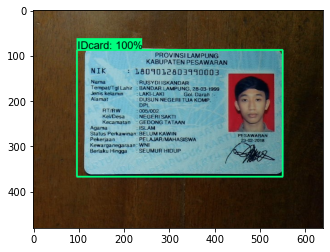

In [167]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Apply OCR to the detection

In [17]:
!pip install easyocr

In [19]:
!pip install torch torchvision torchaudio

In [149]:
import easyocr

In [150]:
detection_threshold = 0.7

In [151]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [152]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.18442425 0.15083817 0.7625679  0.8612722 ]
[ 88.52364063  96.53642654 366.03258133 551.21421814]
[([[172, 2], [317, 2], [317, 22], [172, 22]], 'PROVINSI LAMPUNG', 0.937419868022018), ([[153, 17], [335, 17], [335, 37], [153, 37]], 'KABUPATEN PESAWARAN', 0.9986942681130297), ([[29, 35], [67, 35], [67, 55], [29, 55]], 'NIK', 0.868076863916578), ([[122, 35], [319, 35], [319, 59], [122, 59]], '11809012803990003', 0.29792430329483244), ([[29, 65], [67, 65], [67, 77], [29, 77]], 'Nama', 0.6555348695913857), ([[137, 65], [253, 65], [253, 81], [137, 81]], 'RUSYDI ISKANDAR', 0.5814989459257011), ([[31, 77], [127, 77], [127, 91], [31, 91]], 'Tempat Tgl Lahir', 0.7935897272392682), ([[137, 79], [319, 79], [319, 93], [137, 93]], 'BANDAR LAMPUNG, 28-03-1999', 0.9002266010834707), ([[31, 91], [107, 91], [107, 103], [31, 103]], 'Jenis Kelamin', 0.9509365590964854), ([[137, 91], [197, 91], [197, 105], [137, 105]], 'LAKI LAKI', 0.8683756644061964), ([[235, 93], [299, 93], [299, 105], [235, 105]], 'Go

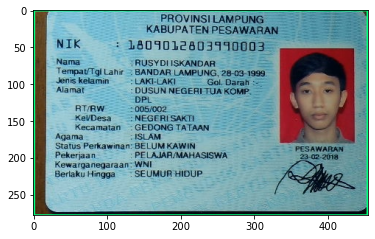

In [153]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [197]:
def filter_text(ocr_result):
    
    provinsi = []
    kabupaten = []
    NIK = []
    nama = []
    ttl = []
    kelamin = []
    alamat = []
    agama = []
    status = []
    pekerjaan = []
    kewarganegaraan = []
        
    for idx, result in enumerate(ocr_result):
        if 'PROV' in result[1]:
            provinsi.append(ocr_result[0][1])
        elif 'KAB' in result[1]:
            kabupaten.append(ocr_result[1][1])
        elif result[1] == 'NIK':
            NIK.append(ocr_result[idx+1][1])
        elif result[1] == 'Nama':
            nama.append(ocr_result[idx+1][1])
        elif 'Lahi' in result[1]:
            ttl.append(ocr_result[idx+1][1])
        elif 'Jen' in result[1]:
            kelamin.append(ocr_result[idx+1][1])
        elif 'Alam' in result[1]:
            alamat.append(ocr_result[idx+1][1])
        elif result[1] == 'Agama':
            agama.append(ocr_result[idx+1][1])
            status.append(ocr_result[idx+2][1])
        elif result[1] == 'Pekerjaan':
            pekerjaan.append(ocr_result[idx+1][1])
            kewarganegaraan.append(ocr_result[idx+3][1])
                
    return provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan

In [198]:
def ocr_it(image, detections, detection_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        print(box)
        roi = box*[height, width, height, width]
        print(roi)
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)

        provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan = filter_text(ocr_result)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        
        print(provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan) 
        return provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.18442425 0.15083817 0.7625679  0.8612722 ]
[ 88.52364063  96.53642654 366.03258133 551.21421814]


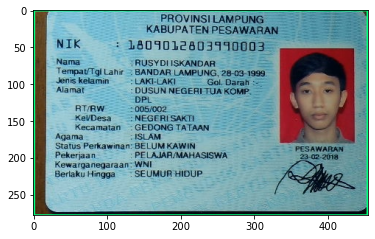

['PROVINSI LAMPUNG'] ['KABUPATEN PESAWARAN'] ['11809012803990003'] ['RUSYDI ISKANDAR'] ['BANDAR LAMPUNG, 28-03-1999'] ['LAKI LAKI'] ['DUSUN NEGERI TUA KOMP.'] ['ISLAM'] ['Status Perkawinan: BELUMKAWIN'] ['PELAJARIMAHASISWA'] ['Kewarganegaraan; WNI']


In [176]:
provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan, region = ocr_it(image_np_with_detections, detections, 0.7)

# Save the results

In [160]:
import csv
import uuid

In [195]:
def save_results(provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan])

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.23199132 0.20216304 0.7988702  0.88006073]
[111.35583401 129.38434601 383.45769882 563.23886871]


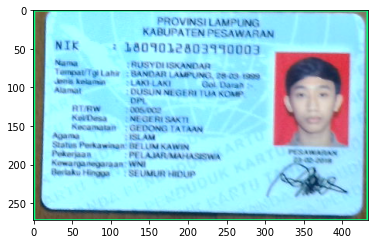

[] [] [] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.17064744 0.21387842 0.7477545  0.9121213 ]
[ 81.91077232 136.8821907  358.92216682 583.75762939]


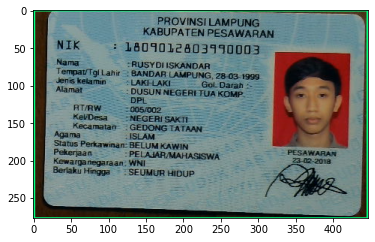

['PROVINSI LAMPUNG'] ['KABUPATEN PESAWARAN'] ['1809012803940003'] ['RUSYDI ISKANOAR'] ['BANDAR LAMPUNG,28 03-1999'] ['LAKILAKI'] ['DUSUN NEGERI TUAKOMP'] ['AISLAM'] ['Status Pertawinan: BELUMKAWIN'] ['PELA MAMAHASISWA'] ['Kerarganegaraan; WNI']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.19841015 0.22246742 0.78326464 0.9514042 ]
[ 95.23687363 142.37915039 375.96702576 608.8986969 ]


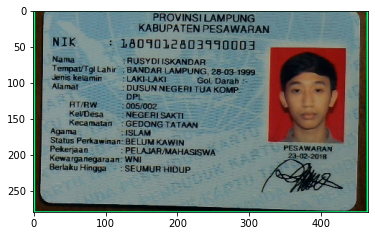

['PROVINSI LAMPUNG'] ['KABUPATEN PESAWARAN'] ['1809012803990003'] ['Hingga'] ['BANDAR LAMPUNG;, 28-03 1999'] ['LAKI LAKI'] ['DUSUN NEGERI TUA KOMP'] ['JSLAM'] ['Status Perkawinan: BELUMKAWIN'] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.19009048 0.21895021 0.79508495 0.97043747]
[ 91.24342918 140.12813568 381.64077759 621.07997894]


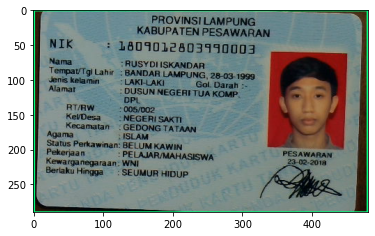

['PROVINSILAMPUNG'] ['KABUPATEN PESAWARAN'] ['1809012803990003'] ['RUSY DI ISKANDAA'] ['BANDAR LAMPUNG,28-03-1999'] ['LAKI LAKI'] ['GL Darah'] ['ISLAM'] ['Stalus'] ['PELAJARMMAHASISWA'] ['Kewarganegaraan']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.13788593 0.10155004 0.7922464  0.92911094]
[ 66.18524551  64.99202728 380.27827263 594.63100433]


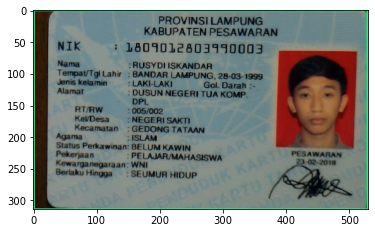

['PROVINSI LAMPUNG'] ['KABUPATEN PESAWARAN'] ['1809012803990003'] ['RUSYDI ISKANDAR'] ['BANDAR LAMPUNG, 28-03 1999'] [] ['DUSUN NEGERI TUA KOMP'] ['ISLAM'] ['Status Perkawinan: BELUM KAWIN'] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.13329116 0.08030429 0.7912904  0.89369285]
[ 63.97975445  51.39474869 379.81939316 571.96342468]


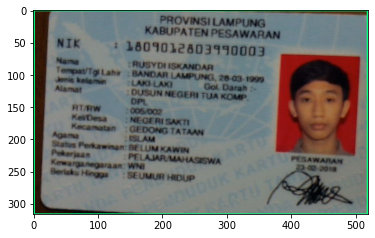

['PROVNSILAUPUNG'] ['KABUPATEN PESAWARAN'] ['1809012803790003'] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.09749022 0.05051318 0.7953961  0.91697025]
[ 46.79530621  32.32843399 381.79012299 586.86096191]


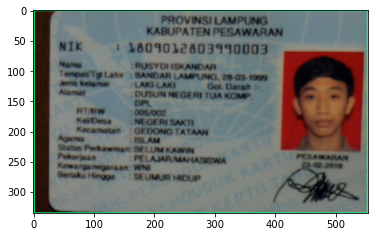

['PROVLNSILAHPUNG'] [] [] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.03758982 0.2106143  0.7552602  0.9890685 ]
[ 18.04311275 134.79314804 362.52490997 633.00384521]


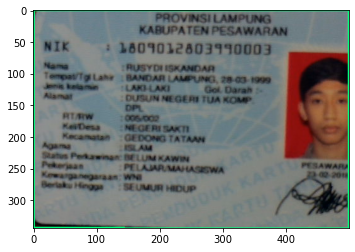

['PROVNISILANPUNG'] [] [] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.01095253 0.18782157 0.7191548  0.9908945 ]
[  5.2572155  120.20580292 345.19429207 634.17247772]


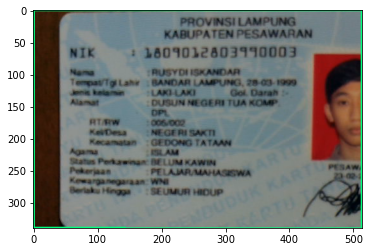

['PROVNNSILANPUNG'] ['KABUPATENPESAWARAN'] [] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.00744787 0.1679422  0.67791116 0.96486795]
[  3.57497692 107.48300552 325.39735794 617.51548767]


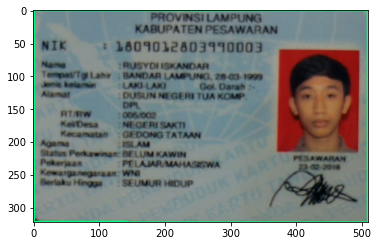

['PROVINSILANPUNG'] [] ['1809012003990003'] [] [] [] [] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.2411192  0.24630827 0.77106863 0.8725949 ]
[115.73721886 157.63729095 370.11294365 558.46073151]


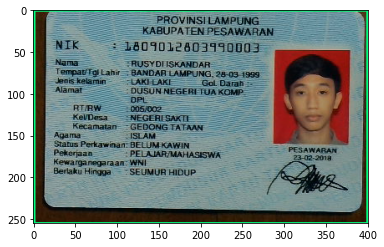

['PROVINSILAMPUNG'] ['KABUPA TEN PESAWARAN'] ['1809012803990003'] [] [] [] ['DUSUN NEGERI TUAKOMP'] [] [] [] []


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.2781805  0.35192493 0.8048059  0.96846235]
[133.52664471 225.23195267 386.30681992 619.81590271]


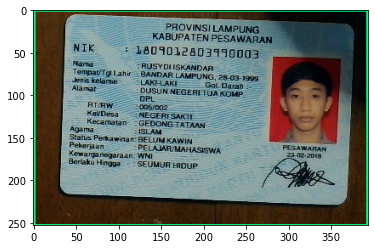

[] ['KABUPATEN PESAWARAN'] [] [] [] ['2403-1945'] ['DIShn'] [] [] ['PELA MR MAHASISWA'] ['Kewamanenaraan; WNl']


In [199]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan, region = ocr_it(image_np_with_detections, detections, 0.7)
        save_results(provinsi, kabupaten, NIK, nama, ttl, kelamin, alamat, agama, status, pekerjaan, kewarganegaraan, region, 'Idcardresult.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')